# Heart Stroke Prediction


In this machine learning project, we would be working with predicting the chances of a person to suffer from stroke. We would be using different machine learning techniques and get a good understanding of them. 

We would first be reading the data that contains the information about the chances of person suffering from a heart stroke respectively. We would first perform data analysis and check if we have all the values in place before using machine learning algorithms respectively. 

We would start with performing data visualization which is needed for analysis. We would understand the relationships between different features and see if there are any values that are related to each other. We would perform univariate analysis and bivariate analysis to understand the data and see how the features are related to each other. We would be performing different machine learning techniques and ensure that we get the best output respectively. 

We'll first import libraries that are needed and to be accessed from the starting cell onwards respectively.


In [186]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from termcolor import colored
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.utils import resample
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
seed = 101

We would be reading the dataframe and storing it in a variable so that it could be accessed later when needed.

In [187]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

We would first read the first 5 rows of the dataframe and understand the columns and the type of rows present by looking at the head of dataframe respectively.

In [188]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


We would be looking at different columns of the data and check if there are any null values present in that respectively. We see from the result that there are a few "bmi" values missing from the data.

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


We would also check the null values in this way. We see below that there are a few bmi values that are missing in the data respectively. 

In [86]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Since we have very few values that are missing or null values, it is a good idea to remove them so that we get a much accurate output respectively. We use dropna in order to remove the rows that are null as can be seen below.

In [87]:
df.dropna(inplace = True)

We again check the number of null values and see that there are not many present respectively. 

In [88]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

We would be using the countplot and check the total number of values of the output present to get an intuition respectively. 

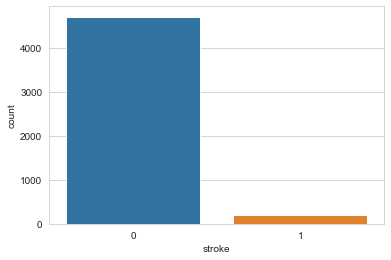

In [89]:
sns.countplot(df['stroke'])

We see that the class is highly imbalanced and we would have to perform class balancing just to ensure that we don't get outputs from the model that are too awayed by the majority class respectively. 

In [90]:
df_majority = df[df.stroke == 0]
df_minority = df[df.stroke == 1]

We would be checking the shape of the majority class and ensure that we understand the total number of rows per different stroke categories.

In [91]:
df_majority.shape

(4700, 12)

We would be checking the minority class and see that we understand the total number of minority classes per different stroke categories. 

In [92]:
df_minority.shape

(209, 12)

We would be upsampling the data and get a good understanding of it and perform visualizations just to get a sense of the data respectively. 

In [93]:
df_minority_upsample = resample(df_minority, replace = True, n_samples = df_majority.shape[0], random_state = 101)

We would be concatenating the data that we have upsampled and downsampled so that we get a good version of it.

In [94]:
df_upsampled = pd.concat([df_majority, df_minority_upsample])

We would again check using the countplot whether there are equal number of classes in our data respectively. 

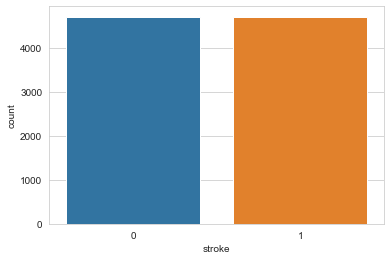

In [95]:
sns.countplot(df_upsampled['stroke'])

We would have to create a copy of the dataframe so that we don't alter the actual dataframe values. Therefore, we use "copy" to ensure that we get the best results respectively. 

In [96]:
df = df_upsampled.copy()

We would create two variables that would take the input and the output respectively. We would have to delete 'stroke' feature in the input as we are going to predict that in the output respectively. In addition to this, we would have to take 'stroke' as the output y respectively as we would be predicting the value. 

In [97]:
X = df.drop('stroke', axis = 1)
y = df['stroke']

In [98]:
len(X)

9400

We would be dividing the data into train and test set respectively. Since we have a large amount of data, we would take about 20 percent of the values to be the test set respectively. 

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

We would look at the head of the dataframe just to understand the split of training set respectively.

In [100]:
X_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
465,621,Male,69.0,0,0,Yes,Private,Rural,101.52,26.8,smokes
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked
109,59125,Female,53.0,0,0,Yes,Govt_job,Urban,64.17,41.5,never smoked
3567,63949,Female,33.0,0,0,Yes,Govt_job,Urban,75.67,44.7,never smoked
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


We would use the countplot just to see how the values are present in the output training set respectively

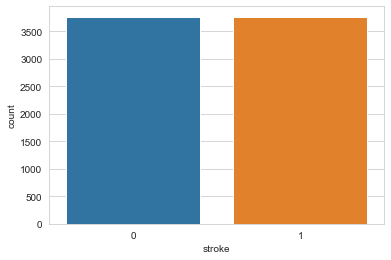

In [190]:
sns.countplot(y_train)

We are again checking the head of the dataframe just to make sure that everything is right. 

In [102]:
X_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
465,621,Male,69.0,0,0,Yes,Private,Rural,101.52,26.8,smokes
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked
109,59125,Female,53.0,0,0,Yes,Govt_job,Urban,64.17,41.5,never smoked
3567,63949,Female,33.0,0,0,Yes,Govt_job,Urban,75.67,44.7,never smoked
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


We have a specific feature called "Residence_type" where we can check whether the people are from Rural areas or Urban areas respectively. 

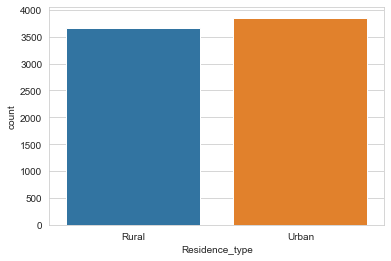

In [103]:
sns.countplot(X_train['Residence_type'])

We would be looking at the mean values after grouping by using the Residence_type and ensure that we get the right outputs respectively. 

In [104]:
X_train.groupby('Residence_type').mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
Residence_type,,,,,,
Rural,36852.935897,54.187889,0.185488,0.112111,119.176318,29.455019
Urban,37940.270109,55.253306,0.186300,0.122470,120.757784,29.836430


We would be dividing the data using "work_type" where we would be checking the mean value of the hypertension and plotting a bar plot.

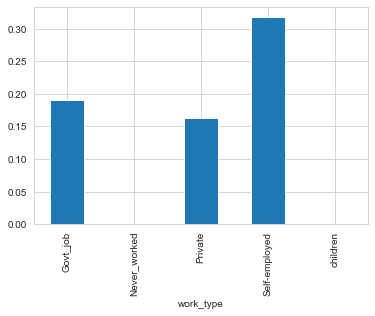

In [105]:
X_train.groupby('work_type').mean()['hypertension'].plot.bar()

We would be looking at different types of work and the unique categories associated with it. We see different types of works that are unique. 

In [106]:
X_train['work_type'].unique()

array(['Private', 'Govt_job', 'Self-employed', 'children', 'Never_worked'],
      dtype=object)

We would uniquely identify the people who has never worked and see some of the trends that are present in the data respectively. 

In [191]:
X_train[X_train['work_type'] == 'Never_worked']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4772,13960,Female,18.0,0,0,No,Never_worked,Urban,97.65,21.5,Unknown
1922,51935,Male,16.0,0,0,No,Never_worked,Urban,59.99,28.2,never smoked
4611,18605,Female,17.0,0,0,No,Never_worked,Urban,78.08,44.9,never smoked
603,61408,Male,23.0,0,0,No,Never_worked,Urban,125.26,18.7,never smoked
3468,37209,Male,17.0,0,0,No,Never_worked,Rural,124.38,31.2,never smoked
3196,57274,Male,14.0,0,0,No,Never_worked,Urban,137.91,41.8,never smoked
1789,13862,Female,13.0,0,0,No,Never_worked,Urban,70.93,22.9,never smoked
2781,23587,Female,16.0,0,0,No,Never_worked,Urban,84.40,25.9,never smoked
2346,61219,Female,14.0,0,0,No,Never_worked,Urban,148.37,22.7,never smoked
4785,58652,Female,16.0,0,0,No,Never_worked,Rural,68.27,20.4,never smoked


We would be looking at the type of work where they are self-employed respectively. We could count the total number of cases where they had a heart disease. 

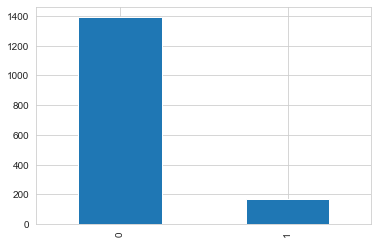

In [108]:
X_train[X_train['work_type'] == 'Self-employed']['heart_disease'].value_counts().plot.bar()

We would also check whether they have never worked. In addition, we would also count the total number of cases where they had a heart disease respectively.

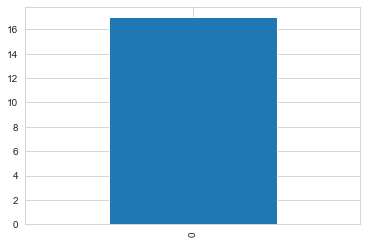

In [109]:
X_train[X_train['work_type'] == 'Never_worked']['heart_disease'].value_counts().plot.bar()

We see from the above that people who never smoked do not have any heart disease from our data. That is quite true in the real-world respectively. 

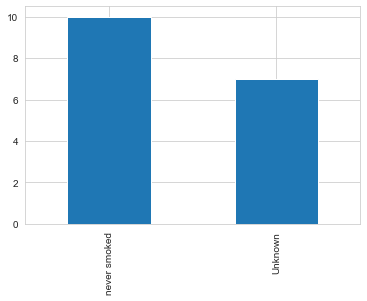

In [110]:
X_train[X_train['work_type'] == 'Never_worked']['smoking_status'].value_counts().plot.bar()

We would check the smoking status of the people that are present in our data respectively. We can see that there are many people who never smoked respectively. We see that in comparision to the non-smokers, there are a few smokers respectively.

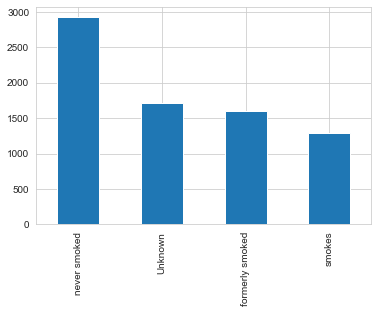

In [111]:
X_train['smoking_status'].value_counts().plot.bar()

We would be looking at the trends where the people have not smoked respectively. We would look at the case of hypertension of these people just to get an understanding of the values that are present in the data respectively.

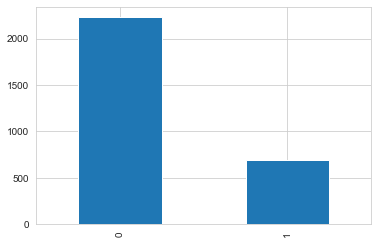

In [112]:
X_train[X_train['smoking_status'] == 'never smoked']['hypertension'].value_counts().plot.bar()

We would be looking at the trends where people would be smoking and see the case of hypertension respectively. We would be again plotting a barplot and get a good understanding of the data.

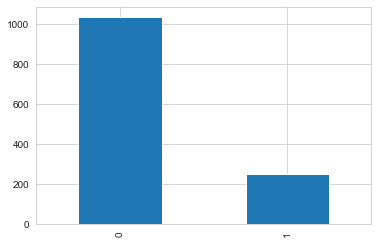

In [113]:
X_train[X_train['smoking_status'] == 'smokes']['hypertension'].value_counts().plot.bar()

We would take into account the correlation between the various values in the training data and plot them later to understand how different features are related to each other.

In [114]:
X_train_corr = X_train.corr()

We would be using heatmap from seaborn which would allow us to understand the correlation better using different color intensities.

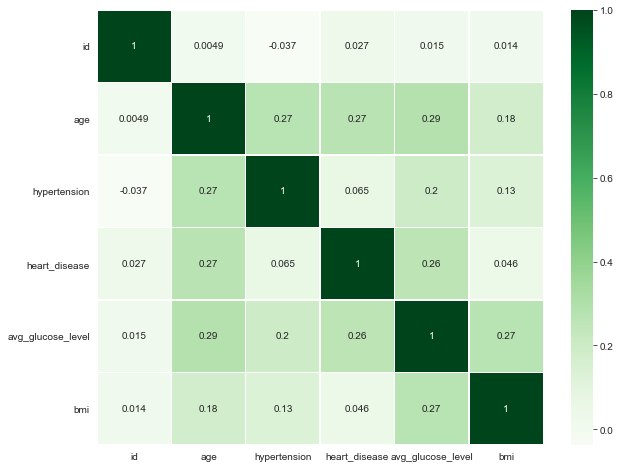

In [115]:
plt.figure(figsize = (10, 8))
sns.heatmap(X_train_corr, annot = True, cmap = "Greens", linewidths = 0.5)

From the observation, it can be seen that age is quite related to whether a person would have hypertension, heart_disease, avg_glucose_level and bmi as can be seen above.

In [116]:
X_train_df = pd.concat([X_train, y_train], axis = 1)

We would be concatenating the data values and then be checking the dataframe to see if there are any values that are related to each other respectively. 

In [117]:
X_train_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
465,621,Male,69.0,0,0,Yes,Private,Rural,101.52,26.8,smokes,0
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
109,59125,Female,53.0,0,0,Yes,Govt_job,Urban,64.17,41.5,never smoked,1
3567,63949,Female,33.0,0,0,Yes,Govt_job,Urban,75.67,44.7,never smoked,0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
859,40970,Male,43.0,0,0,Yes,Private,Urban,135.75,35.9,smokes,0
108,30456,Female,79.0,0,0,Yes,Private,Rural,93.05,24.2,never smoked,1
107,12062,Female,54.0,0,0,Yes,Self-employed,Rural,191.82,40.4,smokes,1
1657,48210,Male,59.0,0,0,Yes,Private,Rural,64.51,31.5,never smoked,0


We would be using the distribution plot where we can understand how the values of age are distributed. We see that there are a lot of people in the age of 80 compared to the rest. Therefore, we can get a good understanding of the data.

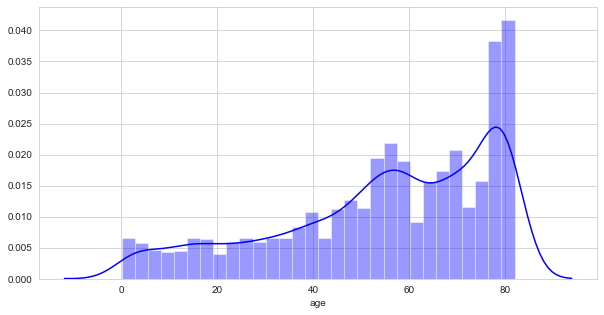

In [192]:
plt.figure(figsize = (10, 5))
sns.distplot(X_train_df['age'], bins = 30, kde = True, color = 'Blue')

We would be using average glucose level and check the distribution respectively. We see how those values are distributed and most of the values lie in the range from 100 to 150 respectively. There are a few cases where they lie from 150 to 250.

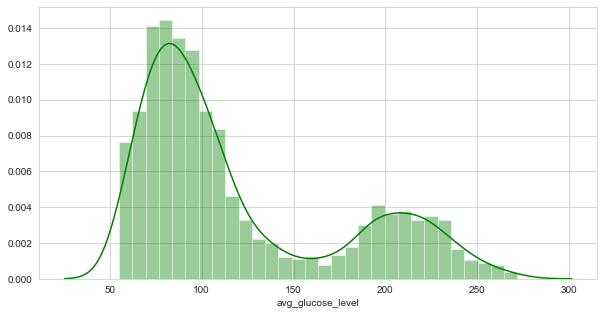

In [119]:
plt.figure(figsize = (10, 5))
sns.distplot(X_train_df['avg_glucose_level'], bins = 30, kde = True, color = 'Green', hist = True)

We would see the percentage of people who have stroke based on the average glucose levels respectively. We would be looking at the values of people which are above 150 and calculating their percentage of having a stroke. 

In [120]:
high_glucose_stroke_percent = (X_train_df[(X_train_df['avg_glucose_level'] > 150)]['stroke'].value_counts()[1]) / (X_train_df[(X_train_df['avg_glucose_level'] > 150)]['stroke'].value_counts()[1] + X_train_df[(X_train_df['avg_glucose_level'] > 150)]['stroke'].value_counts()[0]) * 100

In [121]:
print("The percent of people who are high glucose and have stroke are {}%".format(np.round(high_glucose_stroke_percent, 2)))

The percent of people who are high glucose and have stroke are 75.09%


Based on the above percentage, we see that there is a higher change for a person who has a high glucose level to have stroke respectively.

In [122]:
low_glucose_stroke_percent = (X_train_df[(X_train_df['avg_glucose_level'] < 150)]['stroke'].value_counts()[1]) / (X_train_df[(X_train_df['avg_glucose_level'] < 150)]['stroke'].value_counts()[1] + X_train_df[(X_train_df['avg_glucose_level'] < 150)]['stroke'].value_counts()[0]) * 100

In [123]:
print("The percent of people who are low glucose and have stroke are {}%".format(np.round(low_glucose_stroke_percent, 2)))

The percent of people who are low glucose and have stroke are 41.29%


Based on the above percentage, we see that there is a lower chance for a person who has a low glucose level to have stroke respectively. 

In [124]:
X_train_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
465,621,Male,69.0,0,0,Yes,Private,Rural,101.52,26.8,smokes,0
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
109,59125,Female,53.0,0,0,Yes,Govt_job,Urban,64.17,41.5,never smoked,1
3567,63949,Female,33.0,0,0,Yes,Govt_job,Urban,75.67,44.7,never smoked,0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [125]:
X_train_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
465,621,Male,69.0,0,0,Yes,Private,Rural,101.52,26.8,smokes,0
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
109,59125,Female,53.0,0,0,Yes,Govt_job,Urban,64.17,41.5,never smoked,1
3567,63949,Female,33.0,0,0,Yes,Govt_job,Urban,75.67,44.7,never smoked,0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
859,40970,Male,43.0,0,0,Yes,Private,Urban,135.75,35.9,smokes,0
108,30456,Female,79.0,0,0,Yes,Private,Rural,93.05,24.2,never smoked,1
107,12062,Female,54.0,0,0,Yes,Self-employed,Rural,191.82,40.4,smokes,1
1657,48210,Male,59.0,0,0,Yes,Private,Rural,64.51,31.5,never smoked,0


In [126]:
X_train_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
465,621,Male,69.0,0,0,Yes,Private,Rural,101.52,26.8,smokes,0
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
109,59125,Female,53.0,0,0,Yes,Govt_job,Urban,64.17,41.5,never smoked,1
3567,63949,Female,33.0,0,0,Yes,Govt_job,Urban,75.67,44.7,never smoked,0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
859,40970,Male,43.0,0,0,Yes,Private,Urban,135.75,35.9,smokes,0
108,30456,Female,79.0,0,0,Yes,Private,Rural,93.05,24.2,never smoked,1
107,12062,Female,54.0,0,0,Yes,Self-employed,Rural,191.82,40.4,smokes,1
1657,48210,Male,59.0,0,0,Yes,Private,Rural,64.51,31.5,never smoked,0


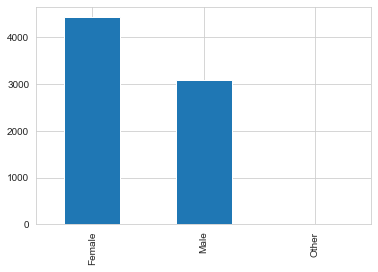

In [127]:
X_train_df['gender'].value_counts().plot.bar()

In [128]:
type(X_train_df['gender'])

pandas.core.series.Series

In [129]:
X_train_df['gender'].value_counts()

Female    4429
Male      3090
Other        1
Name: gender, dtype: int64

In [130]:
X_train_df = X_train_df[X_train_df['gender'] != 'Other']

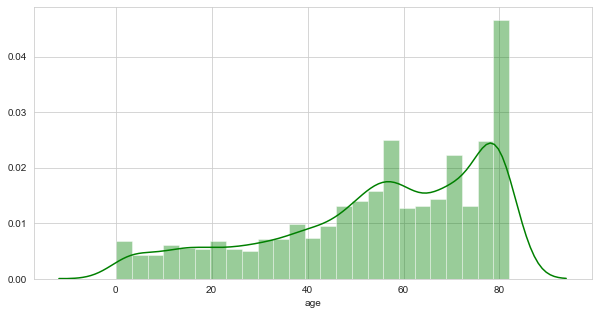

In [131]:
plt.figure(figsize = (10, 5))
sns.distplot(X_train_df['age'], color = 'green')

In [132]:
X_train_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
465,621,Male,69.0,0,0,Yes,Private,Rural,101.52,26.8,smokes,0
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
109,59125,Female,53.0,0,0,Yes,Govt_job,Urban,64.17,41.5,never smoked,1
3567,63949,Female,33.0,0,0,Yes,Govt_job,Urban,75.67,44.7,never smoked,0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [133]:
X_train_df.groupby('ever_married').mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
ever_married,,,,,,,
No,37586.832858,31.538528,0.113520,0.050770,98.221363,26.166115,0.223046
Yes,37353.241415,61.790843,0.207943,0.137704,126.599983,30.711082,0.583073


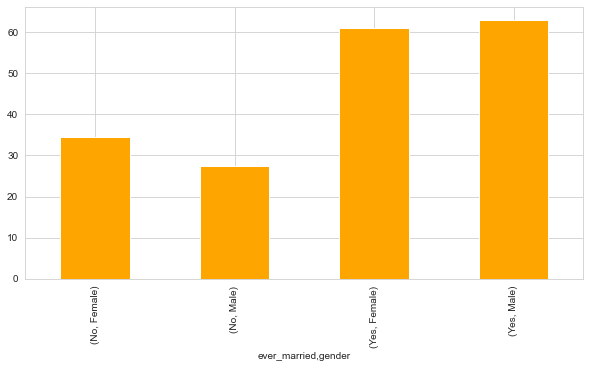

In [134]:
plt.figure(figsize = (10, 5))
X_train_df.groupby(['ever_married', 'gender'])['age'].mean().plot.bar(color = 'orange')

In [135]:
X_train_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
465,621,Male,69.0,0,0,Yes,Private,Rural,101.52,26.8,smokes,0
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
109,59125,Female,53.0,0,0,Yes,Govt_job,Urban,64.17,41.5,never smoked,1
3567,63949,Female,33.0,0,0,Yes,Govt_job,Urban,75.67,44.7,never smoked,0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


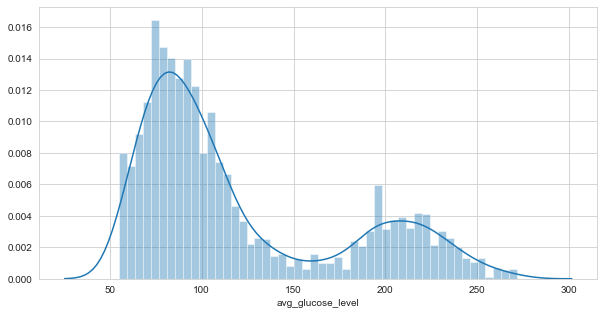

In [136]:
plt.figure(figsize = (10, 5))
sns.distplot(X_train_df['avg_glucose_level'], bins = 50)

In [137]:
X_train_df.describe(percentiles = [0.1, 0.2, 0.5, 0.8, 0.9])

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,7519.000000,7519.000000,7519.000000,7519.000000,7519.000000,7519.000000,7519.000000
mean,37407.701556,54.737736,0.185929,0.117436,119.983715,29.651456,0.499136
std,21508.354421,22.356951,0.389075,0.321960,56.157965,7.349265,0.500033
min,77.000000,0.080000,0.000000,0.000000,55.120000,11.300000,0.000000
10%,6985.600000,18.000000,0.000000,0.000000,67.410000,21.300000,0.000000
20%,13998.800000,35.000000,0.000000,0.000000,74.986000,23.900000,0.000000
50%,37060.000000,59.000000,0.000000,0.000000,97.430000,28.600000,0.000000
80%,59437.000000,77.000000,0.000000,0.000000,190.140000,34.800000,1.000000
90%,66639.800000,80.000000,1.000000,1.000000,215.940000,39.200000,1.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


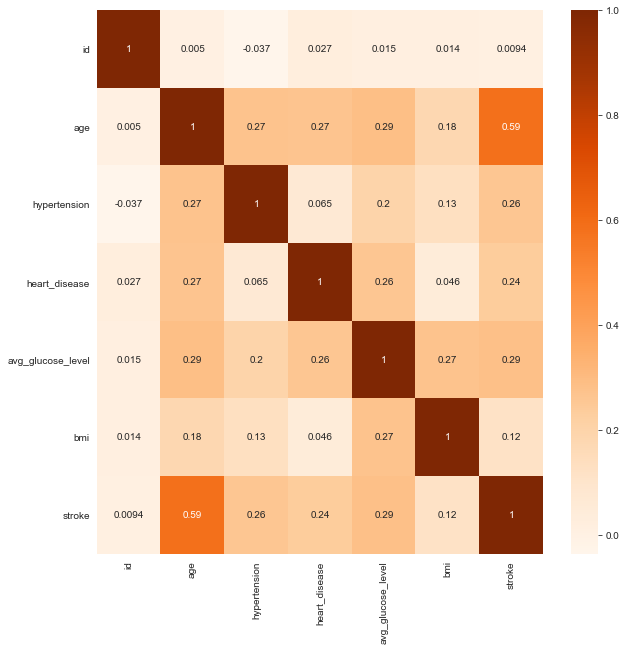

In [138]:
plt.figure(figsize = (10, 10))
sns.heatmap(X_train_df.corr(), annot = True, cmap = 'Oranges')

Age is a significant factor that would determine if a person would have a stroke or not. We see that the machine learning models are going to be using different parameters and the more we are learning the different models respectively, the better would the machine learning algorithms perform in the long term. 

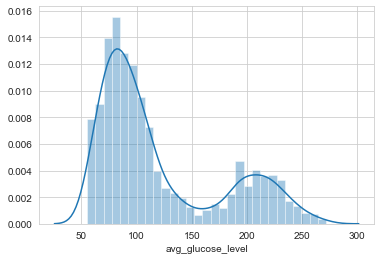

In [139]:
sns.distplot(X_train_df['avg_glucose_level'])

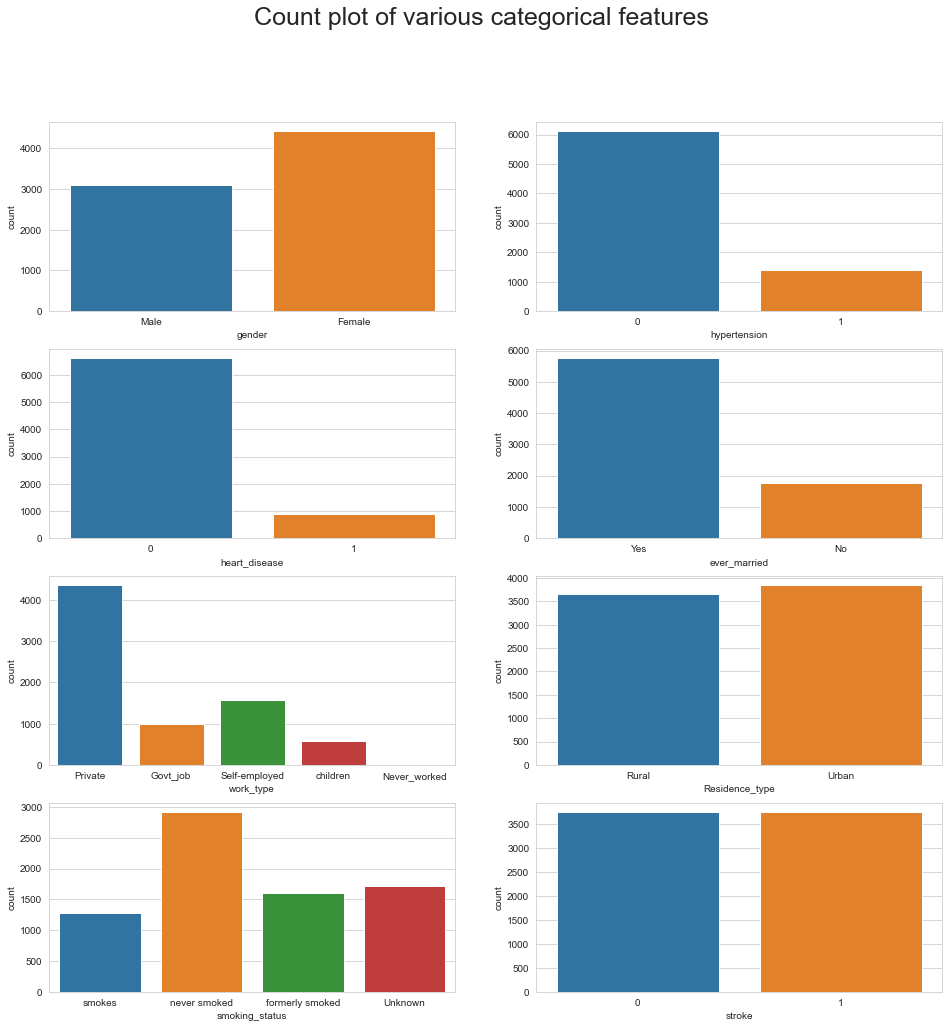

In [140]:
fig, axes = plt.subplots(4, 2, figsize = (16, 16))
sns.set_style('whitegrid')
fig.suptitle("Count plot of various categorical features", fontsize = 25)

sns.countplot(ax = axes[0, 0], data = X_train_df, x= 'gender')
sns.countplot(ax = axes[0, 1], data = X_train_df, x= 'hypertension')
sns.countplot(ax = axes[1, 0], data = X_train_df, x= 'heart_disease')
sns.countplot(ax = axes[1, 1], data = X_train_df, x= 'ever_married')
sns.countplot(ax = axes[2, 0], data = X_train_df, x= 'work_type')
sns.countplot(ax = axes[2, 1], data = X_train_df, x= 'Residence_type')
sns.countplot(ax = axes[3, 0], data = X_train_df, x= 'smoking_status')
sns.countplot(ax = axes[3, 1], data = X_train_df, x= 'stroke')

plt.show()

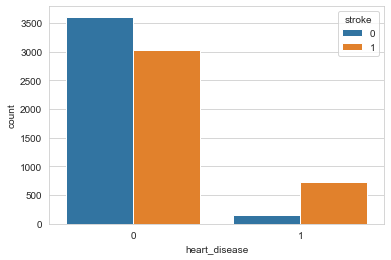

In [141]:
sns.countplot(data = X_train_df, x= 'heart_disease', hue = 'stroke')

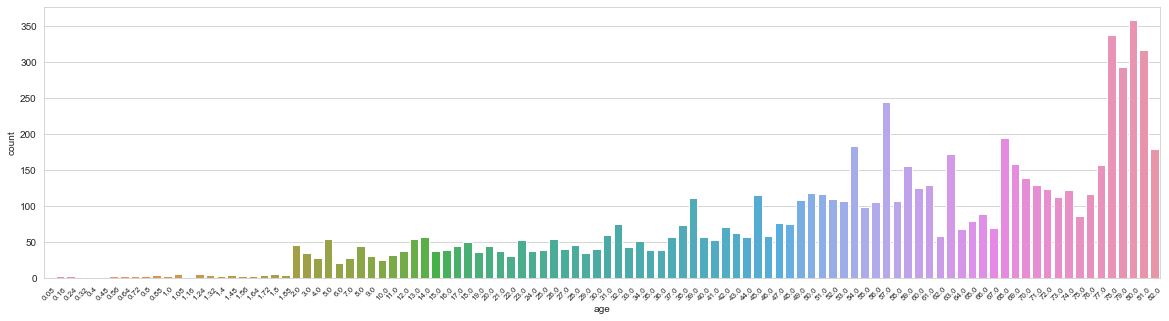

In [142]:
plt.figure(figsize = (20, 5))
plt.xticks(rotation = 45, fontsize = 8)
sns.countplot(data = X_train_df, x = 'age')

In [143]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7520 entries, 465 to 1855
Data columns (total 11 columns):
id                   7520 non-null int64
gender               7520 non-null object
age                  7520 non-null float64
hypertension         7520 non-null int64
heart_disease        7520 non-null int64
ever_married         7520 non-null object
work_type            7520 non-null object
Residence_type       7520 non-null object
avg_glucose_level    7520 non-null float64
bmi                  7520 non-null float64
smoking_status       7520 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 865.0+ KB


In [144]:
X_test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
165,42899,Male,78.0,0,0,Yes,Self-employed,Urban,133.19,23.6,formerly smoked
14,5317,Female,79.0,0,1,Yes,Private,Urban,214.09,28.2,never smoked
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown
4688,40041,Male,31.0,0,0,No,Self-employed,Rural,64.85,23.0,Unknown


In [145]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [146]:
X_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
465,621,Male,69.0,0,0,Yes,Private,Rural,101.52,26.8,smokes
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked
109,59125,Female,53.0,0,0,Yes,Govt_job,Urban,64.17,41.5,never smoked
3567,63949,Female,33.0,0,0,Yes,Govt_job,Urban,75.67,44.7,never smoked
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


In [147]:
X_train['gender'].value_counts()

Female    4429
Male      3090
Other        1
Name: gender, dtype: int64

In [148]:
X_train['work_type'].value_counts()

Private          4370
Self-employed    1563
Govt_job          994
children          576
Never_worked       17
Name: work_type, dtype: int64

In [149]:
pd.get_dummies(X_train[['gender', 'Residence_type']])

,gender_Female,gender_Male,gender_Other,Residence_type_Rural,Residence_type_Urban
465,0,1,0,1,0
10,1,0,0,1,0
109,1,0,0,0,1
3567,1,0,0,0,1
5,0,1,0,0,1
...,...,...,...,...,...
859,0,1,0,0,1
108,1,0,0,1,0
107,1,0,0,1,0
1657,0,1,0,1,0


In [150]:
X_train['Residence_type'].value_counts()

Urban    3854
Rural    3666
Name: Residence_type, dtype: int64

In [151]:
encoder = OneHotEncoder()
encoder.fit(X_train[['gender', 'work_type']])
new_output = encoder.transform(X_train[['gender', 'work_type']])
print(new_output)

  (0, 1)	1.0
  (0, 5)	1.0
  (1, 0)	1.0
  (1, 5)	1.0
  (2, 0)	1.0
  (2, 3)	1.0
  (3, 0)	1.0
  (3, 3)	1.0
  (4, 1)	1.0
  (4, 5)	1.0
  (5, 1)	1.0
  (5, 6)	1.0
  (6, 0)	1.0
  (6, 5)	1.0
  (7, 0)	1.0
  (7, 5)	1.0
  (8, 1)	1.0
  (8, 5)	1.0
  (9, 0)	1.0
  (9, 7)	1.0
  (10, 0)	1.0
  (10, 5)	1.0
  (11, 0)	1.0
  (11, 7)	1.0
  (12, 1)	1.0
  :	:
  (7507, 5)	1.0
  (7508, 1)	1.0
  (7508, 5)	1.0
  (7509, 0)	1.0
  (7509, 5)	1.0
  (7510, 0)	1.0
  (7510, 5)	1.0
  (7511, 1)	1.0
  (7511, 6)	1.0
  (7512, 0)	1.0
  (7512, 5)	1.0
  (7513, 0)	1.0
  (7513, 6)	1.0
  (7514, 1)	1.0
  (7514, 3)	1.0
  (7515, 1)	1.0
  (7515, 5)	1.0
  (7516, 0)	1.0
  (7516, 5)	1.0
  (7517, 0)	1.0
  (7517, 6)	1.0
  (7518, 1)	1.0
  (7518, 5)	1.0
  (7519, 0)	1.0
  (7519, 5)	1.0


In [152]:
X_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
465,621,Male,69.0,0,0,Yes,Private,Rural,101.52,26.8,smokes
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked
109,59125,Female,53.0,0,0,Yes,Govt_job,Urban,64.17,41.5,never smoked
3567,63949,Female,33.0,0,0,Yes,Govt_job,Urban,75.67,44.7,never smoked
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


In [153]:
scaler = MinMaxScaler()
type(scaler.fit_transform(X_train[['age', 'heart_disease']]))

numpy.ndarray

In [154]:
X_train_new = X_train.copy()
X_test_new = X_test.copy()

In [155]:
type(new_output)

scipy.sparse.csr.csr_matrix

In [156]:
def preprocessing_steps(data_train, data_test):
    cat_variables = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
    encoder = OneHotEncoder()
    one_hot_encoded_output_train = encoder.fit_transform(data_train[cat_variables])
    one_hot_encoded_output_test = encoder.transform(data_test[cat_variables])
    #print(one_hot_encoded_output_train)
    one_hot_encoded_output_train = one_hot_encoded_output_train.toarray()
    one_hot_encoded_output_test = one_hot_encoded_output_test.toarray()
    print(one_hot_encoded_output_train)
    data_train.drop(['id'], axis = 1, inplace = True)
    data_test.drop(['id'], axis = 1, inplace = True)
    data_train.drop(cat_variables, axis = 1, inplace = True)
    data_test.drop(cat_variables, axis = 1, inplace = True)
    data_train = data_train.to_numpy()
    data_test = data_test.to_numpy()
    data_train = np.concatenate((data_train, one_hot_encoded_output_train), axis = 1)
    data_test = np.concatenate((data_test, one_hot_encoded_output_test), axis = 1)
    print(data_train)
    scaler = MinMaxScaler()
    data_train = scaler.fit_transform(data_train)
    data_test = scaler.transform(data_test)

    return data_train, data_test  

In [157]:
X_train_preprocessed, X_test_preprocessed = preprocessing_steps(X_train_new, X_test_new)

[[0. 1. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]]
[[69.  0.  0. ...  0.  0.  1.]
 [81.  1.  0. ...  0.  1.  0.]
 [53.  0.  0. ...  0.  1.  0.]
 ...
 [54.  0.  0. ...  0.  0.  1.]
 [59.  0.  0. ...  0.  1.  0.]
 [47.  0.  0. ...  0.  0.  1.]]


In [158]:
X_train_preprocessed[0]

array([0.84130859, 0.        , 0.        , 0.21419998, 0.17960603,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       1.        ])

In [159]:
X_train_preprocessed.shape

(7520, 21)

In [160]:
X_test_preprocessed.shape

(1880, 21)

In [161]:
model = SVC()
model.fit(X_train_preprocessed, y_train)
y_predict = model.predict(X_test_preprocessed)

In [162]:
from sklearn.metrics import classification_report, confusion_matrix

In [163]:
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.72      0.84      0.78       796
           1       0.87      0.76      0.81      1084

    accuracy                           0.79      1880
   macro avg       0.79      0.80      0.79      1880
weighted avg       0.80      0.79      0.79      1880



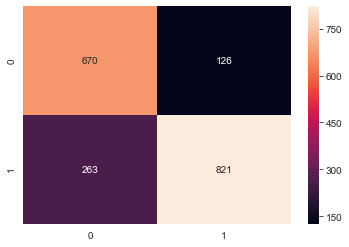

In [164]:
sns.heatmap(confusion_matrix(y_predict, y_test), annot = True, fmt = '3d')

In [165]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import calibration
from sklearn.metrics import log_loss
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

## Logistic Regression

for alpha = 1e-06
Log Loss : 0.4819444730468241
for alpha = 1e-05
Log Loss : 0.4682016399817749
for alpha = 0.0001
Log Loss : 0.45726883542720853
for alpha = 0.001
Log Loss : 0.46008742469424535
for alpha = 0.01
Log Loss : 0.4835170319075455


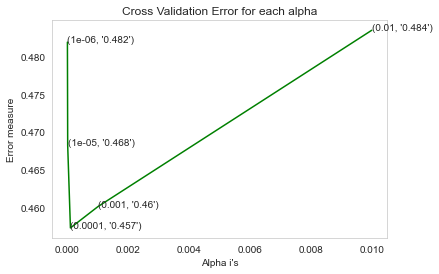

For values of best alpha =  0.0001 The train log loss is: 0.46622549667745966
For values of best alpha =  0.0001 The cross validation log loss is: 0.45726883542720853
For values of best alpha =  0.0001 The test log loss is: 0.45726883542720853


In [166]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------
alpha = [10 ** x for x in range(-6, -1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train_preprocessed, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_preprocessed, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_test_preprocessed)
    cv_log_error_array.append(log_loss(y_test, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_test, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train_preprocessed, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_preprocessed, y_train)

predict_y = sig_clf.predict_proba(X_train_preprocessed)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_preprocessed)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_preprocessed)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

In [167]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train_preprocessed, y_train)
y_predictions = clf.predict(X_test_preprocessed)
confusion_matrix(y_predictions, y_test)

array([[667, 150],
       [266, 797]], dtype=int64)

In [168]:
y_predict

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [169]:
from sklearn.ensemble import RandomForestClassifier

## Random Forest Classifier

In [177]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10,50,100,200]
max_depth = [2,3,5,10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(X_train_preprocessed, y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(X_train_preprocessed, y_train)
        sig_clf_probs = sig_clf.predict_proba(X_test_preprocessed)
        cv_log_error_array.append(log_loss(y_test, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_test, sig_clf_probs)) 
'''
fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/4)],max_depth[int(i%4)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(X_train_preprocessed, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_preprocessed, y_train)

predict_y = sig_clf.predict_proba(X_train_preprocessed)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_preprocessed)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 10 and max depth =  2
Log Loss : 0.5105312394519393
for n_estimators = 10 and max depth =  3
Log Loss : 0.473925541983636
for n_estimators = 10 and max depth =  5
Log Loss : 0.4167765037634166
for n_estimators = 10 and max depth =  10
Log Loss : 0.11762288756406253
for n_estimators = 50 and max depth =  2
Log Loss : 0.48376120357564556
for n_estimators = 50 and max depth =  3
Log Loss : 0.46426110602174836
for n_estimators = 50 and max depth =  5
Log Loss : 0.400986811903956
for n_estimators = 50 and max depth =  10
Log Loss : 0.11075379605579702
for n_estimators = 100 and max depth =  2
Log Loss : 0.4841503522510182
for n_estimators = 100 and max depth =  3
Log Loss : 0.4616998396527529
for n_estimators = 100 and max depth =  5
Log Loss : 0.3997065000604476
for n_estimators = 100 and max depth =  10
Log Loss : 0.11306790442267367
for n_estimators = 200 and max depth =  2
Log Loss : 0.4854796746227492
for n_estimators = 200 and max depth =  3
Log Loss : 0.46140339863

In [178]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(max_depth=max_depth[int(best_alpha%4)], n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_features='auto',random_state=42)
clf.fit(X_train_preprocessed, y_train)
y_predictions = clf.predict(X_test_preprocessed)
print(classification_report(y_predictions, y_test))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       824
           1       0.99      0.89      0.94      1056

    accuracy                           0.93      1880
   macro avg       0.93      0.94      0.93      1880
weighted avg       0.94      0.93      0.93      1880



## Naive Bayes Classifier

for alpha = 1e-05
Log Loss : 0.583212086667293
for alpha = 0.0001
Log Loss : 0.5832120870572438
for alpha = 0.001
Log Loss : 0.583212090955759
for alpha = 0.1
Log Loss : 0.5832125088482722
for alpha = 1
Log Loss : 0.5832153890753108
for alpha = 10
Log Loss : 0.5831951920994667
for alpha = 100
Log Loss : 0.5826140284118843
for alpha = 1000
Log Loss : 0.5795351275204925
for alpha = 10000
Log Loss : 0.5760113525422926
for alpha = 1000000
Log Loss : 0.5753951278132645


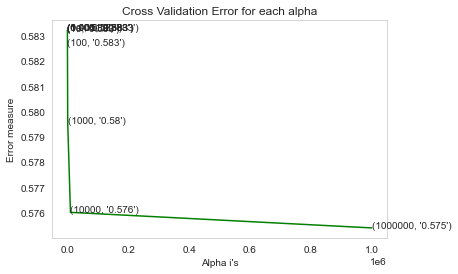

For values of best alpha =  1000000 The train log loss is: 0.5568668137822864
For values of best alpha =  1000000 The cross validation log loss is: 0.5653530285769109
For values of best alpha =  1000000 The test log loss is: 0.5653530285769109


In [179]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000, 10000, 1000000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(X_train_preprocessed, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_preprocessed, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_test_preprocessed)
    cv_log_error_array.append(log_loss(y_test, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_test, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train_preprocessed, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_preprocessed, y_train)

predict_y = sig_clf.predict_proba(X_train_preprocessed)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_preprocessed)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_preprocessed)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

In [180]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = MultinomialNB(alpha=i)
clf.fit(X_train_preprocessed, y_train)
y_predictions = clf.predict(X_test_preprocessed)
print(classification_report(y_predictions, y_test))

              precision    recall  f1-score   support

           0       0.47      0.72      0.57       619
           1       0.81      0.61      0.70      1261

    accuracy                           0.65      1880
   macro avg       0.64      0.66      0.63      1880
weighted avg       0.70      0.65      0.66      1880



## K Nearest Neighbors

for alpha = 2
Log Loss : 0.1153077123726213
for alpha = 3
Log Loss : 0.11590594568536587
for alpha = 4
Log Loss : 0.11777657977150771
for alpha = 5
Log Loss : 0.12193068838379116
for alpha = 10
Log Loss : 0.22861756933266128
for alpha = 20
Log Loss : 0.3845683951667106


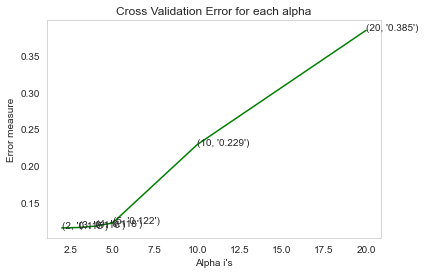

For values of best alpha =  2 The train log loss is: 0.5583403898193494
For values of best alpha =  2 The cross validation log loss is: 0.5667036551037684
For values of best alpha =  2 The test log loss is: 0.5667036551037684


In [181]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------
alpha = [2, 3, 4, 5, 10, 20]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train_preprocessed, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_preprocessed, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_test_preprocessed)
    cv_log_error_array.append(log_loss(y_test, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_test, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train_preprocessed, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_preprocessed, y_train)

predict_y = sig_clf.predict_proba(X_train_preprocessed)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_preprocessed)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_preprocessed)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

In [182]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = KNeighborsClassifier(n_neighbors = i)
clf.fit(X_train_preprocessed, y_train)
y_predictions = clf.predict(X_test_preprocessed)
print(classification_report(y_predictions, y_test))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       812
           1       1.00      0.89      0.94      1068

    accuracy                           0.94      1880
   macro avg       0.94      0.94      0.94      1880
weighted avg       0.94      0.94      0.94      1880



## Support Vector Machines

for alpha = 1e-05
Log Loss : 0.5651229308724675
for alpha = 0.0001
Log Loss : 0.5651229301832839
for alpha = 0.001
Log Loss : 0.5548987413773884
for alpha = 0.01
Log Loss : 0.46897868027550527
for alpha = 0.1
Log Loss : 0.45810092160887333
for alpha = 1
Log Loss : 0.4578626507534425
for alpha = 10
Log Loss : 0.45790731622219655
for alpha = 100
Log Loss : 0.4580115088360601


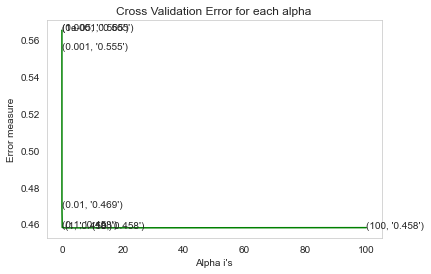

For values of best alpha =  1 The train log loss is: 0.5552438877412313
For values of best alpha =  1 The cross validation log loss is: 0.5634512543540585
For values of best alpha =  1 The test log loss is: 0.5634512543540585


In [183]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf.fit(X_train_preprocessed, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_preprocessed, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_test_preprocessed)
    cv_log_error_array.append(log_loss(y_test, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_test, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train_preprocessed, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_preprocessed, y_train)

predict_y = sig_clf.predict_proba(X_train_preprocessed)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_preprocessed)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_preprocessed)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

In [184]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf.fit(X_train_preprocessed, y_train)
y_predictions = clf.predict(X_test_preprocessed)
print(classification_report(y_predictions, y_test))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       845
           1       0.83      0.76      0.79      1035

    accuracy                           0.78      1880
   macro avg       0.78      0.78      0.78      1880
weighted avg       0.79      0.78      0.78      1880

